In [1]:
import sys
import pandas as pd
import numpy as np
from gtfparse import read_gtf
import csv
from tabulate import tabulate
import os
import gzip
import xlrd
import shutil
from scipy import stats
from os import listdir
from os.path import isfile, join
from combat.pycombat import pycombat

import scipy as sp
from lifelines import CoxPHFitter
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
dataset = pd.read_pickle("final_dataset.pkl")

In [3]:
X_data= dataset.iloc[:,:-2]
X_data

gene_id,A1CF,A4GALT,A4GNT,AACS,AADAC,AADAT,AASDH,AASDHPPT,AASS,ABAT,...,VDAC2,VDAC3,VKORC1,VKORC1L1,XDH,XYLB,XYLT1,XYLT2,ZACN,ZADH2
0,224.518251,6.080021,-0.392517,5.628013,1815.001237,65.985677,10.254550,98.590195,97.935638,252.230544,...,152.734992,359.439574,1047.477543,19.948712,79.491941,18.642186,1.159269,9.603232,85.939119,194.782534
1,255.495907,4.371351,-0.130795,3.016931,1935.799718,84.922695,12.572281,91.958489,158.316034,414.247103,...,136.198872,283.770050,1932.263096,25.773488,143.789933,46.171826,2.846241,8.170569,63.301343,204.297533
2,161.461870,5.511647,-1.130063,3.489908,2319.161275,29.684790,15.457675,135.930744,273.625569,112.276948,...,156.636504,416.183180,627.370707,16.895550,118.058349,44.480900,0.154784,43.695447,75.905369,68.663355
3,100.824154,7.902192,-1.130063,12.405444,739.997350,45.994264,12.289441,123.084189,29.958576,133.805022,...,94.833096,384.095402,2576.682597,26.540067,159.545180,12.624975,1.847519,15.619849,76.162260,82.142553
4,184.023064,16.953734,2.239916,17.986600,1457.771910,14.831465,23.118508,109.108498,89.797280,261.876093,...,218.847731,326.434425,609.211240,35.653009,128.178009,82.091953,10.302212,23.550066,80.340009,213.988351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,5.975748,50.825808,4.285170,12.523481,-240.990008,-2.483306,16.094313,147.720103,-2.620187,2.035854,...,398.263015,590.929698,807.526151,37.964067,7.916621,2.194635,13.764792,18.536899,97.960197,252.651616
228,174.365200,23.501875,3.232084,21.621618,1610.067465,41.050697,18.785534,171.686330,6.968554,135.138792,...,215.510492,769.587983,1822.297763,37.575333,18.875453,104.139793,0.760138,39.263981,97.017666,337.301206
229,339.523976,5.507910,0.638759,15.440387,5198.351456,12.519955,18.856227,139.207263,81.918175,168.744628,...,150.630730,111.869856,939.899602,20.415830,13.904091,34.100246,0.494743,17.450417,29.995134,107.879231
230,126.096442,4.353566,0.999106,12.581200,925.355154,46.172985,8.217365,57.830954,697.850186,164.114659,...,118.440826,584.448311,406.449099,45.125643,30.863681,36.956954,0.472793,19.043588,41.644671,88.693079


(600, 2181)
[1 1 2 1 1 1 0 1 2 0 0 1 2 1 1 0 1 1 1 1 0 2 1 1 1 1 2 2 1 0 1 1 1 0 1 0 1
 0 1 1 2 0 2 1 1 0 2 1 0 2 1 1 2 1 1 2 0 1 1 0 2 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 2 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 2 2 1 2 2 1 1 0 1 1 0 1 1 1 0 2
 1 1 0 0 0 1 0 1 0 1 2 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 2 2 2 1 0 1 0 1 1 2 1
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 1 1 0 2 1 1 2 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1
 2 1 1 1 1 0 0 2 1 1 0 0 1 2 1 1 0 1 1 1 1 1 1 2 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 2 2 0 1 1 1 0 2 1 1 1 2 2 1 0 1 0 0 1 1 1 2 1 2 0 2 2 0 0 0 0 0
 0 2 1 2 1 1 0 0 1 2 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 2 0 0 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 0 1 0 1 2 1 1 1 2 0 1 0 2 1 0 0 1 1 0 1 1 0 0 1 0 1 1
 1 1 0 1 1 0 1 2 1 2 1 0 1 1 2 1 1 2 2 0 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 2 1
 2 2 1 1 1 1 2 1 0 1 2 2 1 1 1 2 1 1 0 2 0 1 1 1 1 2 1 1 0 1 0 1 1 1 1 2 0
 1 0 1 0 0 0 0 0 0 1 2 0 0 2 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 2 2 1 0 1 1 0 1 1 0 1 1 0 2 1 2 2 1 0 1 1 0
 1 1 1 1 1 1 

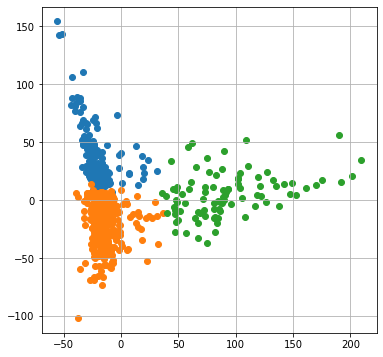

In [4]:


#KMeans
km_df = (X_data.to_numpy()/1000) #koristim mad_df koji je bez survival podataka, zato ne koristimo mad_t_df - tom su dodani survival podaci
print(km_df.shape)

model = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=4,
    max_iter=300,
    )

pca = PCA(n_components = 2)
data1 = pca.fit_transform(km_df)
label1 = model.fit_predict(km_df)

print(label1)

plt.figure(figsize=(6,6))
uniq = np.unique(label1)
for i in uniq:
    plt.scatter(data1[label1 == i , 0] , data1[label1 == i , 1] , label = i)

plt.grid()
plt.show()

## K-medians

Clustering ćemo napraviti i algoritmom K-medians te usporediti rezultate.

S obzirom da ne postoji gotova implementacija K-medians algoritma, izradit ćemo svoju.

In [5]:
from tqdm import tqdm

class KMedians:
    
    def __init__(self, n_clusters, max_iter):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
    def manhattan_distance(self, x1, x2):
        diff = abs(x1 - x2)
        return sum(diff)
    
    def assign_to_clusters(self, X, centroids):
        c = []
        for x in X:
            idx = -1
            min_dist = np.inf
            for i,j in enumerate(centroids):
                dist = self.manhattan_distance(x, j)
                if dist < min_dist:
                    idx = i
                    min_dist = dist
            c.append(idx)
        return c
    
    def shift_centroids(self, X, c):
        clusters = {}
        for i in set(c):
            clusters[i] = []
           
        for x,clster in zip(X, c):
            clusters[clster].append(x)
        
        medians = []
        for x in clusters.values():
            temp =  x[0]
            for i in x[1:]:
                temp = np.c_[temp,i]
            if temp.ndim == 1:
                temp = temp.reshape(-1,len(temp))
            temp = np.median(temp, axis=1)   
            medians.append(temp)
        
        return medians
    
    def calculate_cost(self, X, c, centroids):
        cost = sum([self.manhattan_distance(i, centroids[c[idx]]) for idx, i in enumerate(X)])
        cost /= float(X.shape[0])
        return cost
    
    def fit(self, X):
        best = np.inf
        self.centroids = None
        
        for itr in tqdm(range(self.max_iter)):
            centroid_idx = np.random.choice(range(X.shape[0]), size=self.n_clusters, replace=False)
            centroids = X[centroid_idx]
            
            # Calculate index of closest cluster centroid for each instance.
            c = self.assign_to_clusters(X, centroids)
        
            # Shift the cluster centroids.
            centroids = self.shift_centroids(X, c)
            
            # Calculate the value of the cost function.
            cost = self.calculate_cost(X, c, centroids)
            
            # Store best cluster centroids.
            if cost < best:
                best = cost
                self.centroids = centroids

    def predict(self, X):
        cluster = -np.ones(X.shape[0])
        min_dist = np.inf * np.ones(X.shape[0])
        for idx,i in enumerate(self.centroids):
            for j in range(X.shape[0]):
                dist = self.manhattan_distance(X[j], i)
                if dist < min_dist[j]:
                    min_dist[j] = dist
                    cluster[j] = idx
        return cluster
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

100%|██████████| 300/300 [08:41<00:00,  1.74s/it]


[2. 2. 1. 2. 2. 2. 0. 2. 1. 0. 0. 2. 1. 2. 2. 0. 2. 2. 2. 2. 0. 1. 0. 2.
 2. 2. 1. 1. 0. 0. 2. 2. 2. 0. 2. 0. 2. 0. 2. 2. 1. 0. 1. 2. 2. 0. 1. 2.
 0. 1. 2. 2. 1. 2. 2. 1. 0. 2. 2. 0. 1. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 2. 0. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 1. 2. 0. 2. 2. 1.
 1. 2. 1. 1. 2. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 2. 2. 0. 0. 0. 2. 0. 0. 0.
 2. 1. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 2. 0. 0. 0. 0. 1. 1. 1. 2. 0. 2. 0.
 2. 2. 0. 2. 2. 2. 2. 0. 0. 0. 0. 0. 2. 0. 1. 0. 2. 2. 2. 2. 0. 1. 2. 2.
 1. 2. 2. 2. 2. 0. 2. 0. 0. 0. 2. 2. 0. 0. 2. 2. 2. 1. 2. 2. 2. 2. 0. 0.
 1. 2. 2. 0. 0. 2. 1. 2. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2. 0. 2. 0. 2. 0.
 0. 2. 2. 1. 2. 2. 2. 2. 0. 2. 2. 0. 1. 0. 2. 2. 2. 0. 1. 2. 0. 2. 1. 1.
 2. 0. 2. 0. 0. 2. 2. 2. 1. 2. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 2. 1. 2.
 2. 0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0.
 2. 1. 0. 0. 2. 2. 0. 0. 2. 0. 0. 0. 2. 2. 0. 0. 2. 0. 1. 2. 2. 0. 1. 2.
 2. 2. 1. 0. 1. 0. 1. 2. 0. 0. 2. 2. 0. 2. 2. 0. 0.

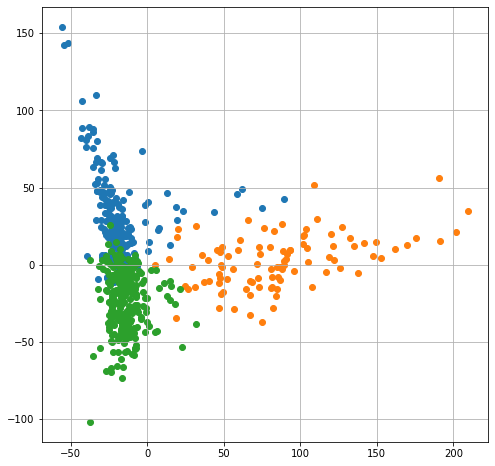

In [6]:
#KMedians
km_df = (X_data.to_numpy()/1000)
model = KMedians(n_clusters=3, max_iter=300)

pca = PCA(n_components = 2)
data = pca.fit_transform(km_df)
label2 = model.fit_predict(km_df)
#for i in range(len(label2)):
print(label2)
plt.figure(figsize=(8,8))
uniq = np.unique(label2)
for i in uniq:
    plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.grid()
plt.show()


Kada clustering radimo pomocu k-medians, dolazi do neravnoteze u brojevima primjera u klasama.

## 3) Klasifikacija pomoću 90 gena

Zadnji korak u ovom projektu je treniranje klasifikatora koji na temelju 90 najznačajnijih gena određuje kojem klasteru (C1, C2, ili C3) pripada karcinom.


In [7]:
#feature selection algoritam
from sklearn.model_selection import train_test_split

train_df = MinMaxScaler().fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(train_df, label1, test_size=0.4, random_state=0)

sel_kbest = SelectKBest(chi2, k=90)
select_df = sel_kbest.fit_transform(X_train, y_train)
select_df_test = sel_kbest.transform(X_test)

print(select_df.shape)
select_df

(360, 90)


array([[0.12844761, 0.43572443, 0.20403121, ..., 0.0813586 , 0.089032  ,
        0.06582788],
       [0.01403614, 0.11207577, 0.06673276, ..., 0.22614507, 0.04403695,
        0.13682712],
       [0.20313803, 0.23397471, 0.01553594, ..., 0.19205168, 0.3203005 ,
        0.10993647],
       ...,
       [0.0434477 , 0.39486554, 0.01799766, ..., 0.03184597, 0.06427627,
        0.01242907],
       [0.13011371, 0.21737207, 0.26295535, ..., 0.19282173, 0.16476599,
        0.12242087],
       [0.04781338, 0.52393448, 0.0808985 , ..., 0.14964268, 0.04795865,
        0.10501501]])

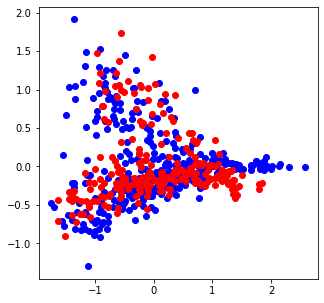

In [8]:
pca = PCA(n_components = 2)
x = pca.fit_transform(select_df)
y = pca.fit_transform(select_df_test)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x[:,0],x[:,1],color="blue")
ax.scatter(y[:,0],y[:,1],color="red")

plt.show()

# ALGORITHMS

In [9]:
#https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix

def plt_confusion_matrix(y_test, y_pred, title):
    
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    f, axes = plt.subplots(1, 2,figsize=(9,3))
    
    if len(title) != 0:
        f.suptitle(title,fontsize=20,y=1.05)
        
    sns.heatmap(cm, annot=True, fmt='d',cmap=plt.cm.Reds,ax=axes[0])
    
    axes[0].set_ylabel('True Label')
    axes[0].set_xlabel('Predicted Label')
    
    sns.heatmap(cmn, annot=True, fmt='.2f',cmap=plt.cm.Blues,ax=axes[1])
    
    axes[1].set_ylabel('True Label')
    axes[1].set_xlabel('Predicted Label')
        
    plt.show(block=False)

In [10]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, chi2

var_thr = VarianceThreshold(threshold=(.0263 * (1 - .0263)))
select_df2 = var_thr.fit_transform(X_train)
select_df2_test = var_thr.transform(X_test)
print(select_df2.shape)

fvalue_selector = SelectKBest(f_classif, k=90)
select_df3 = fvalue_selector.fit_transform(X_train, y_train)
select_df3_test = fvalue_selector.transform(X_test)
print(select_df3.shape)


(360, 193)
(360, 90)


U proširenoj verziji istraživanja provedena je usporedba algoritama odabira 90 najznačajnih značajki te prikazani rezultati algoritama. Podjeljen je skup podataka na skup podataka za učenje modela i skup podataka za treniranje modela.


# SVM

<img style="float: left;" src="svm.png" alt="drawing" width="250"/>

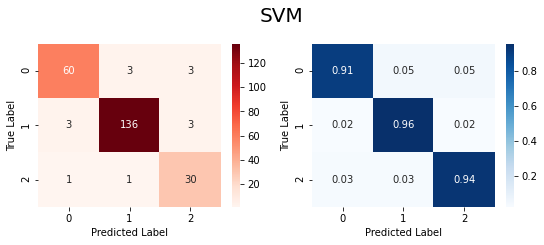

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.97      0.96      0.96       142
           2       0.83      0.94      0.88        32

    accuracy                           0.94       240
   macro avg       0.91      0.93      0.92       240
weighted avg       0.94      0.94      0.94       240



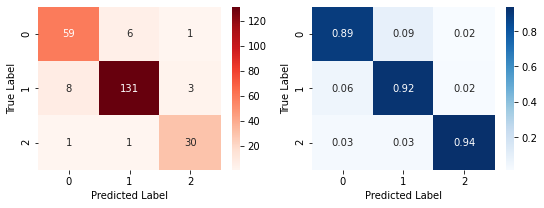

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.95      0.92      0.94       142
           2       0.88      0.94      0.91        32

    accuracy                           0.92       240
   macro avg       0.90      0.92      0.91       240
weighted avg       0.92      0.92      0.92       240



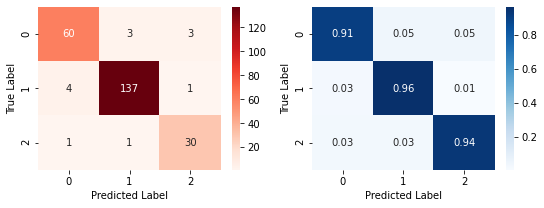

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.97      0.96      0.97       142
           2       0.88      0.94      0.91        32

    accuracy                           0.95       240
   macro avg       0.93      0.94      0.93       240
weighted avg       0.95      0.95      0.95       240



In [11]:
 from sklearn.metrics import plot_confusion_matrix

#klasifikator SVM
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

######################################################

clf.fit(select_df, y_train)
y_pred = clf.predict(select_df_test)

plt_confusion_matrix(y_test, y_pred,"SVM")
print(classification_report(y_test, y_pred))

######################################################

clf.fit(select_df2, y_train)
y_pred2 = clf.predict(select_df2_test)

plt_confusion_matrix(y_test, y_pred2,"")
print(classification_report(y_test, y_pred2))

######################################################

clf.fit(select_df3, y_train)
y_pred3 = clf.predict(select_df3_test)

plt_confusion_matrix(y_test, y_pred3,"")
print(classification_report(y_test, y_pred3))

Precision predstavlja omjer točno pozitivno klasificiranih primjera i zbroja točno pozitivno i lažno pozitivno klasificiranih primjera. Recall je omjer točno pozitivno klasificiranih primjera i zbroja točno pozitivno i lažno negativno klasificiranih primjera. F1-score je kvocijent umnoška precisiona i recalla te zbroja precisiona i recalla, pomnožen s dva. Support je brojnost primjera klasificiranih u pojedinu klasu.
Matrica konfuzije predstavlja koliko primjera svake klase je klasificirano u svaku pojedinačnu klasu.

Iz prikaza rezultata vidimo da je treći algoritam, algoritam SelectKBest s fvalue selektorom dobio najbolje rezultate pri klasifikaciji zadanih primjera.

Pokušat ćemo klasificirati rezultate i pomoću Gradient Boosting klasifikatora kako bismo vidjeli hoćemo li s njim postići bolje rezultate.


## Gradient Boosting

<img style="float: left;" src="gboost.png" alt="drawing" width="300"/>

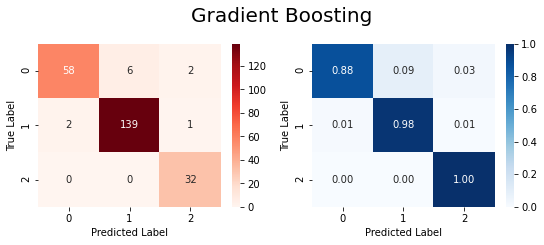

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        66
           1       0.96      0.98      0.97       142
           2       0.91      1.00      0.96        32

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



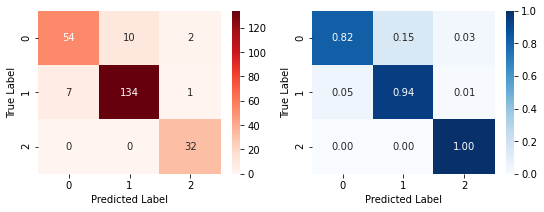

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        66
           1       0.93      0.94      0.94       142
           2       0.91      1.00      0.96        32

    accuracy                           0.92       240
   macro avg       0.91      0.92      0.91       240
weighted avg       0.92      0.92      0.92       240



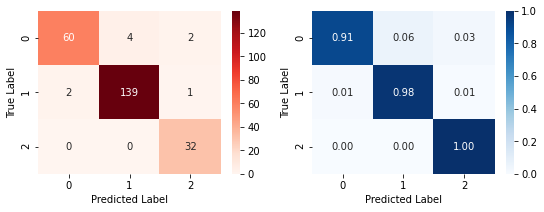

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.97      0.98      0.98       142
           2       0.91      1.00      0.96        32

    accuracy                           0.96       240
   macro avg       0.95      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



In [12]:
# Trees
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=4, random_state=0)

######################################################
clf.fit(select_df, y_train)
y_pred = clf.predict(select_df_test)

plt_confusion_matrix(y_test, y_pred,"Gradient Boosting")
print(classification_report(y_test, y_pred))

######################################################

clf.fit(select_df2, y_train)
y_pred2 = clf.predict(select_df2_test)

plt_confusion_matrix(y_test, y_pred2,"")
print(classification_report(y_test, y_pred2))

######################################################

clf.fit(select_df3, y_train)
y_pred3 = clf.predict(select_df3_test)

plt_confusion_matrix(y_test, y_pred3,"")
print(classification_report(y_test, y_pred3))


Kao što vidimo iz dobivenih rezultata, najbolja klasifikacija je postignuta sa 90 najznačajnijih gena izabranih metodom VarianceThreshold pomoću Gradient Boosting klasifikatora.

## Usporedba k-means i k-medians

Usporedivat ćemo performanse SVM klasifikatora za podatke s k-means klasterima i one s k-medians. U oba slučaja 90 gena je odabrano algoritmom SelectKBest s fvalue sektorom. Da bismo mogli usporediti performanse, potreban nam je skup za ispitivanje, stoga ćemo podijeliti skup za učenje na skup za učenje i skup za ispitivanje u omjeru 70:30.


(600, 90)

Rezultati za k-means:


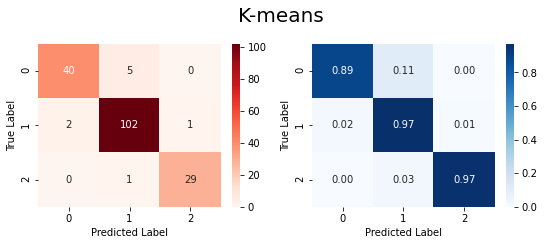

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.94      0.97      0.96       105
           2       0.97      0.97      0.97        30

    accuracy                           0.95       180
   macro avg       0.95      0.94      0.95       180
weighted avg       0.95      0.95      0.95       180


Rezultati za k-medians:


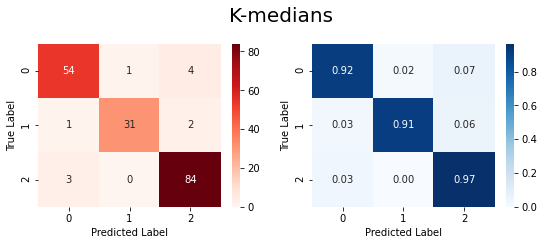

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92        59
         1.0       0.97      0.91      0.94        34
         2.0       0.93      0.97      0.95        87

    accuracy                           0.94       180
   macro avg       0.94      0.93      0.94       180
weighted avg       0.94      0.94      0.94       180



In [13]:
from sklearn.model_selection import train_test_split

fvalue_selector = SelectKBest(f_classif, k=90)
select_df = fvalue_selector.fit_transform(train_df, label1)
print(select_df.shape)

#K-means
select_df_tr, select_df_te, label_tr, label_te = train_test_split(select_df, label1, test_size=0.3)
clf.fit(select_df_tr, label_tr)
y_pred1 = clf.predict(select_df_te)

print("\nRezultati za k-means:")
plt_confusion_matrix(label_te, y_pred1,"K-means")
print(classification_report(label_te, y_pred1))

#K-medians
select_df_tr, select_df_te, label2_tr, label2_te = train_test_split(select_df, label2, test_size=0.3)
clf.fit(select_df_tr, label2_tr)
y_pred2 = clf.predict(select_df_te)

print("\nRezultati za k-medians:")
plt_confusion_matrix(label2_te, y_pred2,"K-medians")
print(classification_report(label2_te, y_pred2))


Vidimo da s k-medians imamo vecu tocnost.

## Klasifikacija pomocu KNN (K Nearest Neighbours)

<img style="float: left;" src="knn.png" alt="drawing" width="250"/>

Usporedit ćemo performanse KNN i SVM klasifikatora nad podacima nad kojima smo proveli k-means, te 90 gena je odabrano uz pomoć SelectKBest s fvalue sektorom. KNN treniramo sa k=5.

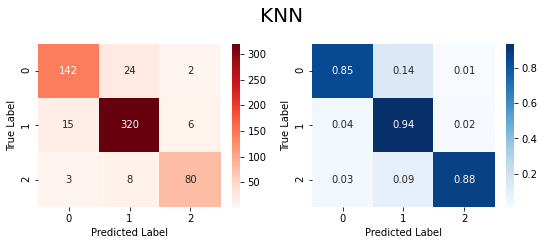

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       168
           1       0.91      0.94      0.92       341
           2       0.91      0.88      0.89        91

    accuracy                           0.90       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.90      0.90       600



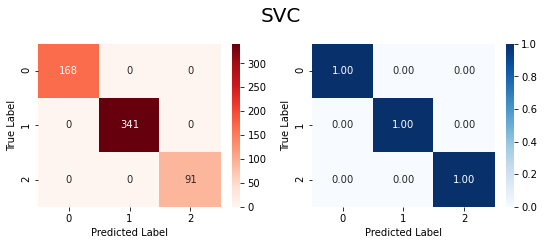

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       341
           2       1.00      1.00      1.00        91

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [14]:
from sklearn.neighbors import KNeighborsClassifier

clf2 = make_pipeline(StandardScaler(), KNeighborsClassifier())
clf2.fit(select_df, label1)

y_pred = clf2.predict(select_df)

plt_confusion_matrix(label1, y_pred,"KNN")
print(classification_report(label1, y_pred))

######################################################

clf.fit(select_df, label1)
y_pred = clf.predict(select_df)

plt_confusion_matrix(label1, y_pred,"SVC")
print(classification_report(label1, y_pred))



Ovakvi su rezultati samo na skupu za učenje, no da bismo ih kvalitetno usporedili, moramo imati i testni skup. Podijelit ćemo trening skup, veličina testnog skupa će biti 30%.


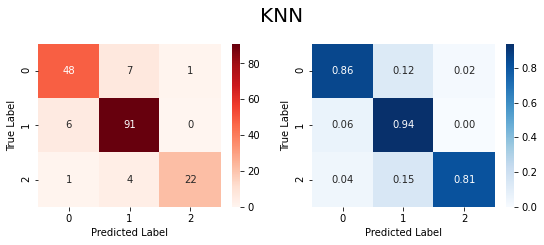

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        56
           1       0.89      0.94      0.91        97
           2       0.96      0.81      0.88        27

    accuracy                           0.89       180
   macro avg       0.91      0.87      0.89       180
weighted avg       0.90      0.89      0.89       180



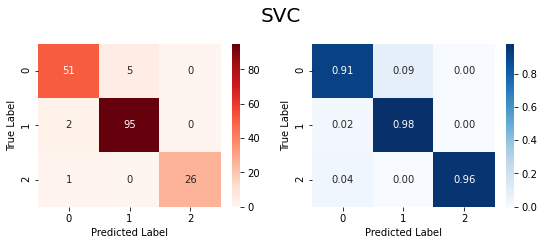

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.95      0.98      0.96        97
           2       1.00      0.96      0.98        27

    accuracy                           0.96       180
   macro avg       0.96      0.95      0.96       180
weighted avg       0.96      0.96      0.96       180



In [15]:
select_df_tr, select_df_te, label_tr, label_te = train_test_split(select_df, label1, test_size=0.3)

######################################################

clf2.fit(select_df_tr, label_tr)
y_pred = clf2.predict(select_df_te)

plt_confusion_matrix(label_te, y_pred,"KNN")
print(classification_report(label_te, y_pred))

######################################################

clf.fit(select_df_tr, label_tr)
y_pred = clf.predict(select_df_te)

plt_confusion_matrix(label_te, y_pred,"SVC")
print(classification_report(label_te, y_pred))


Veću točnost ostvaruje SVC, sto je sukladno očekivanjima. KNN se ne nosi dobro s velikom dimenzionalnosti podataka; u slučaju da su podaci velikih dimenzija potrebno je imati puno primjera, što ovdje nije slučaj.


# Random Forest

<img style="float: left;" src="randomforest.png" alt="drawing" width="250"/>

In [16]:
X = dataset.iloc[:,:-2].to_numpy()/1000

y = dataset.iloc[:,-1].values

colors=[]
for i in y:
    if i==1:
        colors.append("red")
    else:
        colors.append("green")
        
print(len(colors))

600


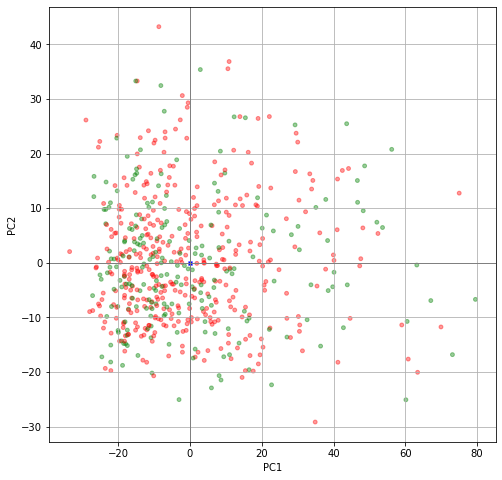

In [17]:

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(figsize=(8,8))

pca = sklearnPCA(n_components=2)

X_s = StandardScaler().fit_transform(X)

Y = pca.fit_transform(X_s)

x1 = Y[:,0]
y1 = Y[:,1]

mu_x1 = np.mean(x1)
mu_y1 = np.mean(y1)
    
ax.scatter(x1, y1, s=15,color = colors,alpha=0.4)
#confidence_ellipse(x1, y1, ax,n_std=1, edgecolor='blue')
ax.scatter(mu_x1, mu_y1, c='blue', s=15,marker="x")

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [18]:
X_ = X_s

y_ = y

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size = 0.3)

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 61.66666666666667


# Neural Network

<img style="float: left;" src="neural-network.png" alt="drawing" width="250"/>

In [20]:
X = X_s
y = dataset.iloc[:,-1].values

array = y.reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(array).toarray()

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Architecture

model = Sequential()
model.add(Dense(50, input_dim=len(X_s[0]), activation="relu",kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(100, activation="relu",kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(2, activation="softmax"))

# Optimizer

from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

import time

t0 = time.process_time()
print("Training")
hist = model.fit(X_train, y_train,epochs=50,batch_size=50,validation_data=(X_test, y_test),verbose=0)
t_elapsed = time.process_time() - t0
print("Elapsed time =",t_elapsed)

Training
Elapsed time = 3.8662749999999733


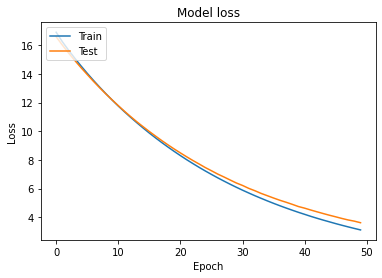

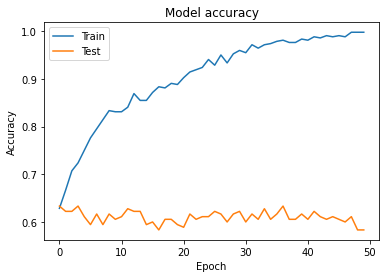

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Appendix

## GEO-SET

Budući da su TCGA i ICGC mjereni jednom metodom (RNA-seq), a GEO skup drugom (Microarray Gene Expression), nije bilo brzog načina za usporedbu (različita normalizacija), ali kao prijedlog proširenja bi se također mogao koristiti članak:

"A New Machine Learning-Based Framework for Mapping Uncertainty Analysis in RNA-Seq Read Alignment and Gene Expression Estimation"

Kako bi se usporedili skupovi i povećala količina podatka.

Potrebno je bilo u R-u importat podatke jer je Python verzija bila zastarjela.

```{r}

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c("GenomicFeatures", "AnnotationDbi"))

BiocManager::install(c("affy"))

BiocManager::install(c("GEOquery"),force=TRUE)

library(affy)
library(Biobase)
library(limma)
library(RCurl)
library(XML)
library(GEOquery)

data <- getGEO('GSE14520', GSEMatrix=TRUE)

data

GEO_DATASETS <- c("GSE14520")
# Use the function we created to return the eset object
eset <- getGEOdataObjects(GEO_DATASETS[1])

# Get the annotation GPL id (see Annotation: GPL10558)
gpl <- getGEO('GSE14520', destdir=".")

gpl = gpl[[1]] # get just the first element in the list
head(fData(gpl))
symbols = fData(gpl)[,'Gene Symbol']


write.table(data.frame(symbols),file="genes.csv",row.names=FALSE,sep="\t")


```

In [23]:
c = pd.read_csv('GSE14520.expression.matrix.csv')  

In [24]:
genes = pd.read_csv('genes.csv')

genes = genes.rename(columns={"symbols": 'Gene Symbol'})

df = pd.ExcelFile('41586_2011_BFnature10350_MOESM321_ESM.xls').parse('All metabolic genes') #you could add index_col=0 if there's an index
gene_set0=set()
for cell in df['Gene Symbol']:
    gene_set0.add(cell)   
    
vdf = pd.DataFrame(gene_set0)

Vdf = vdf.rename(columns={0: 'Gene Symbol'})

p = pd.merge(genes,Vdf,on="Gene Symbol")

p.sort_values(by=['Gene Symbol'])

P = p.drop_duplicates().sort_values(by=['Gene Symbol'])
P

,Gene Symbol
2786,A4GALT
3005,A4GNT
2650,AACS
1224,AADAC
1550,AANAT
...,...
2208,WWOX
2142,XDH
1811,XYLB
2424,XYLT1


In [25]:
c = pd.read_csv('GSE14520.expression.matrix.csv')  

C = c.iloc[P.index.tolist()].reset_index().drop(columns=["index"])

GEO = C.T.set_axis(P["Gene Symbol"].tolist(), axis=1, inplace=False)

GEO

,A4GALT,A4GNT,AACS,AADAC,AANAT,AASDHPPT,AASS,ABAT,ABCA1,ABCA12,...,UXS1,VDAC1,VDAC2,VDAC3,VKORC1,WWOX,XDH,XYLB,XYLT1,XYLT2
GSM362958,3.738,4.499,6.207,6.931,9.250,4.534,9.711,5.586,9.637,4.158,...,5.664,4.719,8.072,6.137,8.405,5.961,7.250,7.327,6.672,4.779
GSM362959,3.722,4.483,5.776,6.627,8.581,4.676,7.461,4.589,8.426,5.601,...,6.597,3.857,8.100,5.256,8.136,5.528,7.423,5.525,5.057,5.084
GSM362960,3.602,4.067,6.665,6.150,9.716,4.173,7.775,5.850,7.708,7.449,...,6.692,3.859,7.537,4.987,8.053,5.931,8.251,7.458,5.580,4.771
GSM362961,3.714,4.673,5.768,5.436,9.116,4.345,9.623,3.990,7.374,8.836,...,4.759,4.764,5.753,5.165,8.907,6.134,7.757,5.864,5.020,5.581
GSM362962,3.433,4.363,6.531,5.551,8.675,4.694,10.299,5.797,8.344,8.692,...,5.944,6.241,6.913,5.456,9.463,6.375,8.250,7.284,5.408,4.992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM712538,3.198,4.993,6.825,5.084,8.708,5.302,8.842,7.642,8.025,10.235,...,5.274,6.823,6.947,7.037,9.539,5.967,8.518,6.788,4.656,5.491
GSM712539,3.214,4.653,8.165,6.318,10.179,3.881,9.352,6.145,8.685,6.302,...,5.321,5.622,8.537,7.451,9.958,6.001,8.443,6.675,5.425,5.366
GSM712540,3.320,5.484,7.629,4.883,8.254,4.080,9.871,7.186,7.880,9.350,...,5.316,6.165,6.685,6.518,9.958,6.107,8.316,6.799,5.390,5.417
GSM712541,3.319,5.294,6.791,4.802,9.476,4.044,9.745,6.618,7.677,9.365,...,5.946,7.559,7.192,7.105,9.630,6.680,8.257,7.598,5.473,5.811


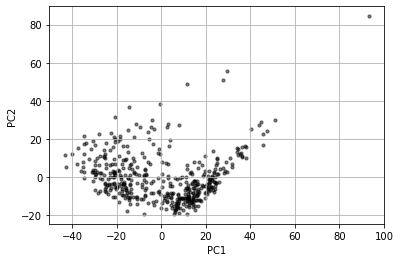

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pca = sklearnPCA(n_components=2)

X = StandardScaler().fit_transform(GEO)

Y = pca.fit_transform(X)

fig, ax = plt.subplots()#figsize=(20,8))

ax.scatter(Y[:,0], Y[:,1],color="black",s=10,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()

/Users/benjamin/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


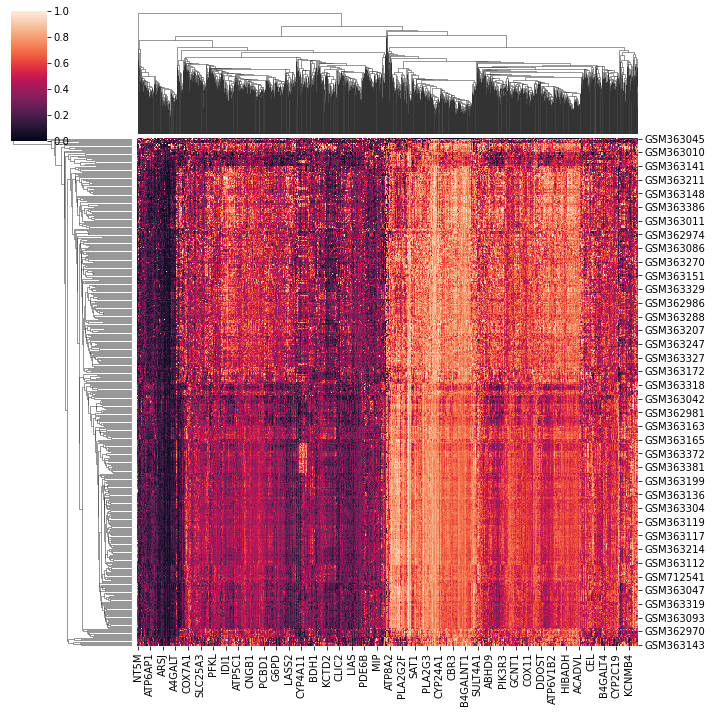

In [27]:
# https://seaborn.pydata.org/generated/seaborn.clustermap.html

# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = GEO
 
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df, standard_scale=1)
plt.show()

# Normalize
#sns.clustermap(df, z_score=1)
#plt.show()